In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import cv2
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import Compose
from sklearn.metrics import precision_score, recall_score, confusion_matrix , f1_score

## We are going to train our model with images, so using GPU becomes a must.

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


## A. Let's examine the dataset

In [3]:
#we Converting data to tensor format
transform = transforms.Compose(
    [transforms.ToTensor()])

In [4]:
train_path = './MNIST/train/'
test_path = './MNIST/test/'

In [5]:
#Downloading And we run the transform on it
trainset = datasets.MNIST(train_path, download=True, train=True, transform=transform)
valset = datasets.MNIST(test_path, download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.0MB/s]


Extracting ./MNIST/train/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]


Extracting ./MNIST/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./MNIST/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.32MB/s]


Extracting ./MNIST/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]


Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.79MB/s]


Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.9MB/s]

Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



In [6]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST/train/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
# Checking data dimensions
print(trainset.data.shape)
targets = np.array(trainset.targets)
print(targets.shape)
print(valset.data.shape)
targets = np.array(valset.targets)
print(targets.shape)

torch.Size([60000, 28, 28])
(60000,)
torch.Size([10000, 28, 28])
(10000,)


In [8]:
dataiter = iter(train_loader)
images ,labels = next(dataiter)


print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


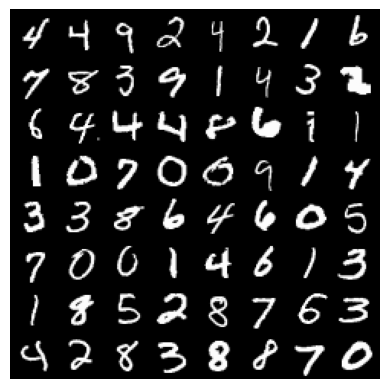

In [9]:
def imshow(img):
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# show images
imshow(torchvision.utils.make_grid(images))

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=64, shuffle=True)





##B. CNN


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(14 * 14 * 64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
      x = self.relu(self.conv1(x))
      x = self.pool(self.relu(self.conv2(x)))
      x = x.view(x.size(0), -1)
      x = self.dropout(self.relu(self.fc1(x)))
      x = self.fc2(x)
      return x

In [16]:
epochs = 15
batch_size = 64
learning_rate = 0.001
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


In [17]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/15], Loss: 0.7870
Epoch [2/15], Loss: 0.3164
Epoch [3/15], Loss: 0.2647
Epoch [4/15], Loss: 0.2402
Epoch [5/15], Loss: 0.2211
Epoch [6/15], Loss: 0.2049
Epoch [7/15], Loss: 0.1967
Epoch [8/15], Loss: 0.1872
Epoch [9/15], Loss: 0.1792
Epoch [10/15], Loss: 0.1738
Epoch [11/15], Loss: 0.1686
Epoch [12/15], Loss: 0.1612
Epoch [13/15], Loss: 0.1558
Epoch [14/15], Loss: 0.1510
Epoch [15/15], Loss: 0.1459


In [18]:
#Review the results
from sklearn.metrics import confusion_matrix ,f1_score ,precision_score ,recall_score, accuracy_score

def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model, device, test_loader)
print('Accuracy: %f' % accuracy_score(actuals, predictions))
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='weighted'))
print('Precision: %f' % precision_score(actuals, predictions, average='weighted'))
print('Recall: %f' % recall_score(actuals, predictions, average='weighted'))

Accuracy: 0.975000
Confusion matrix:
[[ 971    0    1    0    0    2    3    1    2    0]
 [   0 1120    3    1    0    0    3    1    7    0]
 [   7    0 1007    3    3    0    1    4    7    0]
 [   1    0    2  991    0    4    0    8    4    0]
 [   0    0    5    0  952    0    3    3    2   17]
 [   2    0    0    8    0  872    4    1    3    2]
 [   5    3    0    1    4    4  937    1    3    0]
 [   2    6   15    1    0    0    0  992    1   11]
 [   2    1    2    8    3    2    3    4  939   10]
 [   3    5    0    8   12    3    1    4    4  969]]
F1 score: 0.974991
Precision: 0.975006
Recall: 0.975000
